<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.494331,75.747000,3.842909,134.084240,130.691013,3.393228
1,0.0,1.0,56.245050,88.148227,-0.804432,153.588845,154.955786,-1.366941
2,0.0,2.0,72.763293,21.461462,-2.318276,101.906479,103.917269,-2.010789
3,0.0,3.0,92.093888,59.660818,-2.049019,159.705686,161.850465,-2.144778
4,0.0,4.0,65.727440,35.698865,-3.119863,108.306442,111.316151,-3.009709
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.318447,70.919866,-0.666065,175.572248,175.770492,-0.198244
249996,999.0,246.0,63.415051,94.787565,-1.351407,166.851209,167.874104,-1.022895
249997,999.0,247.0,65.391209,30.957084,0.958286,107.306579,106.343160,0.963419
249998,999.0,248.0,29.083976,37.255104,-3.719250,72.619830,76.603582,-3.983752


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.494331  75.747000  3.842909  134.084240  130.691013  3.393228
      1.0    56.245050  88.148227 -0.804432  153.588845  154.955786 -1.366941
      2.0    72.763293  21.461462 -2.318276  101.906479  103.917269 -2.010789
      3.0    92.093888  59.660818 -2.049019  159.705686  161.850465 -2.144778
      4.0    65.727440  35.698865 -3.119863  108.306442  111.316151 -3.009709
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.318447  70.919866 -0.666065  175.572248  175.770492 -0.198244
      246.0  63.415051  94.787565 -1.351407  166.851209  167.874104 -1.022895
      247.0  65.391209  30.957084  0.958286  107.306579  106.343160  0.963419
      248.0  29.083976  37.255104 -3.719250   72.619830   76.603582 -3.983752
      249.0  45.713286  22.963035  0.012545   78.688866   78.878068 -0.189201

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.494331  75.747000  3.842909  134.084240  130.691013  3.393228
      1.0    56.245050  88.148227 -0.804432  153.588845  154.955786 -1.366941
      2.0    72.763293  21.461462 -2.318276  101.906479  103.917269 -2.010789
      3.0    92.093888  59.660818 -2.049019  159.705686  161.850465 -2.144778
      4.0    65.727440  35.698865 -3.119863  108.306442  111.316151 -3.009709
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.318447  70.919866 -0.666065  175.572248  175.770492 -0.198244
      246.0  63.415051  94.787565 -1.351407  166.851209  167.874104 -1.022895
      247.0  65.391209  30.957084  0.958286  107.306579  106.343160  0.963419
      248.0  29.083976  37.255104 -3.719250   72.619830   76.603582 -3.983752
      249.0  45.713286  22.963035  0.012545   78.688866   78.878068 -0.189201

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.494331,75.747000,3.842909,134.084240,130.691013,3.393228
1,0.0,1.0,56.245050,88.148227,-0.804432,153.588845,154.955786,-1.366941
2,0.0,2.0,72.763293,21.461462,-2.318276,101.906479,103.917269,-2.010789
3,0.0,3.0,92.093888,59.660818,-2.049019,159.705686,161.850465,-2.144778
4,0.0,4.0,65.727440,35.698865,-3.119863,108.306442,111.316151,-3.009709
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.318447,70.919866,-0.666065,175.572248,175.770492,-0.198244
249996,999.0,246.0,63.415051,94.787565,-1.351407,166.851209,167.874104,-1.022895
249997,999.0,247.0,65.391209,30.957084,0.958286,107.306579,106.343160,0.963419
249998,999.0,248.0,29.083976,37.255104,-3.719250,72.619830,76.603582,-3.983752


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.494331  75.747000  3.842909  134.084240  130.691013  3.393228
      1.0    56.245050  88.148227 -0.804432  153.588845  154.955786 -1.366941
      2.0    72.763293  21.461462 -2.318276  101.906479  103.917269 -2.010789
      3.0    92.093888  59.660818 -2.049019  159.705686  161.850465 -2.144778
      4.0    65.727440  35.698865 -3.119863  108.306442  111.316151 -3.009709
...                ...        ...       ...         ...         ...       ...
999.0 245.0  95.318447  70.919866 -0.666065  175.572248  175.770492 -0.198244
      246.0  63.415051  94.787565 -1.351407  166.851209  167.874104 -1.022895
      247.0  65.391209  30.957084  0.958286  107.306579  106.343160  0.963419
      248.0  29.083976  37.255104 -3.719250   72.619830   76.603582 -3.983752
      249.0  45.713286  22.963035  0.012545   78.688866   78.878068 -0.189201

[250000 rows x 6 columns]

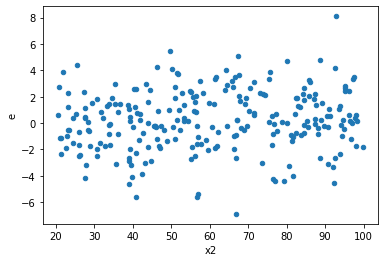

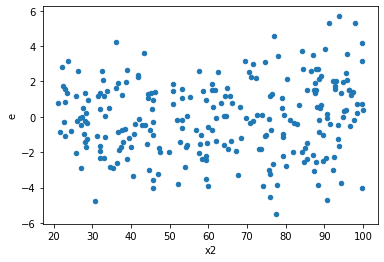

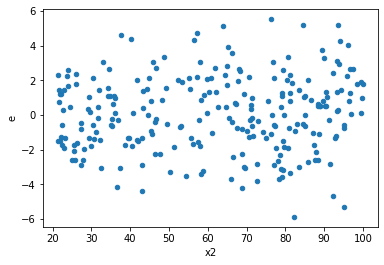

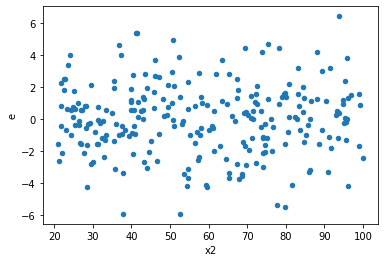

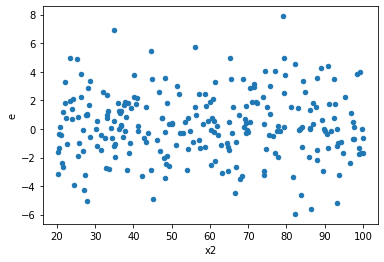

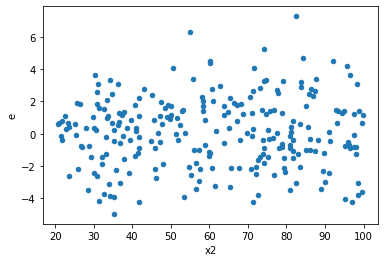

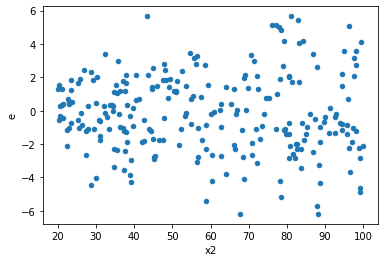

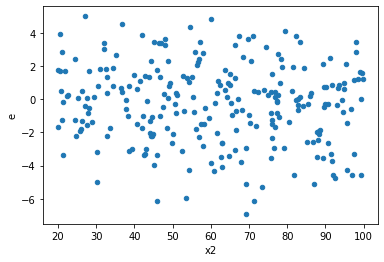

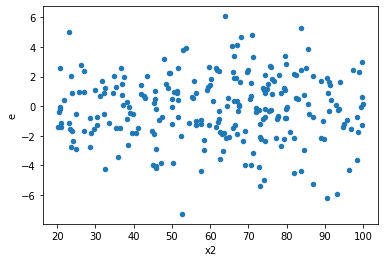

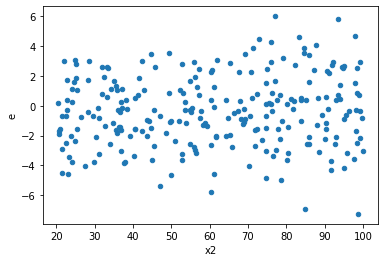

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,131.0,115.0,499.15041682224813,567.539522554508,3.8103085253606728,4.9351262830826785,1.295203852978161,0.15602407832221954,0.9219879608388902,0.07801203916110977,Reject005=1 : Homoscedasticity
3.0,128.0,118.0,498.7222297131009,682.234299145955,3.8962674196336007,5.781646602931822,1.483893680859185,0.030226594313126354,0.9848867028434368,0.015113297156563177,Reject005=0 : Heteroscedasticity
4.0,129.0,117.0,613.1616809137349,665.0513656986476,4.753191324912674,5.684199706826048,1.1958701676984314,0.32527039606342933,0.8373648019682853,0.16263519803171467,Reject005=1 : Homoscedasticity
7.0,142.0,104.0,731.7846521700565,641.1269029244256,5.153413043451102,6.164681758888708,1.1962328086087948,0.3344871215627072,0.8327564392186464,0.1672435607813536,Reject005=1 : Homoscedasticity
8.0,112.0,134.0,430.6068054799728,767.7754982610059,3.8447036203569,5.729667897470193,1.4902755747238363,0.027089850997129572,0.9864550745014352,0.013544925498564786,Reject005=0 : Heteroscedasticity
9.0,131.0,115.0,603.2106673066739,783.7225361970272,4.604661582493694,6.8149785756263235,1.4800172506783034,0.03193466670410339,0.9840326666479483,0.015967333352051694,Reject005=0 : Heteroscedasticity
12.0,133.0,113.0,523.5820804737515,748.0636171066099,3.936707371983094,6.620032009793007,1.6816164840970143,0.004705898240975781,0.9976470508795121,0.0023529491204878905,Reject005=0 : Heteroscedasticity
13.0,118.0,128.0,559.6558788379511,722.0784969503685,4.742846430830094,5.641238257424754,1.1894203912559367,0.3359774683114227,0.8320112658442886,0.16798873415571136,Reject005=1 : Homoscedasticity
18.0,94.0,152.0,392.19066296445123,702.3882518501017,4.172241095366503,4.62097534111909,1.107552328711524,0.5713621972070357,0.7143189013964821,0.28568109860351787,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,126.0,120.0,664.0195643130199,594.8480039511952,5.269996542166825,4.957066699593294,0.9406204842698309,0.7337115541463163,Reject005=1 : Homoscedasticity
1.0,131.0,115.0,499.15041682224813,567.539522554508,3.8103085253606728,4.9351262830826785,1.295203852978161,0.15602407832221954,Reject005=1 : Homoscedasticity
2.0,137.0,109.0,641.7256910982527,460.1137028109952,4.684129132104034,4.2212266312935345,0.9011764006167415,0.5619241476935499,Reject005=1 : Homoscedasticity
3.0,128.0,118.0,498.7222297131009,682.234299145955,3.8962674196336007,5.781646602931822,1.483893680859185,0.030226594313126354,Reject005=0 : Heteroscedasticity
4.0,129.0,117.0,613.1616809137349,665.0513656986476,4.753191324912674,5.684199706826048,1.1958701676984314,0.32527039606342933,Reject005=1 : Homoscedasticity
5.0,116.0,130.0,543.898742482545,593.9303408011286,4.688782262780561,4.568694929239451,0.9743883748890709,0.8887543584375068,Reject005=1 : Homoscedasticity
6.0,121.0,125.0,846.0531675881482,462.6049215527095,6.992174938745026,3.7008393724216764,0.5292830063382128,0.0004928062944647984,Reject005=0 : Heteroscedasticity
7.0,142.0,104.0,731.7846521700565,641.1269029244256,5.153413043451102,6.164681758888708,1.1962328086087948,0.3344871215627072,Reject005=1 : Homoscedasticity
8.0,112.0,134.0,430.6068054799728,767.7754982610059,3.8447036203569,5.729667897470193,1.4902755747238363,0.027089850997129572,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      815
Reject005=0 : Heteroscedasticity    185
Name: Result_test, dtype: int64